In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
cd G:\machine learning\data

G:\machine learning\data


In [2]:
import os 
import tarfile 
from six.moves import urllib
DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(spam_path  = SPAM_PATH , spam_url = SPAM_URL) :
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
    tar_bz2_file = tarfile.open(path)
    tar_bz2_file.extractall(path=SPAM_PATH)
    tar_bz2_file.close()

In [3]:
fetch_spam_data()

In [4]:
ham_dir = os.path.join(SPAM_PATH ,'easy_ham')
spam_dir = os.path.join(SPAM_PATH , 'spam')
ham_filenames = [names for names in sorted(os.listdir(ham_dir)) if len(names) >20]
spam_filenames = [names for names in sorted(os.listdir(spam_dir)) if len(names) >20 ]

In [5]:
len(ham_filenames)

2500

In [6]:
len(spam_filenames)

500

In [7]:
path = os.getcwd()

In [8]:
os.listdir(path)

['datasets',
 'mldata',
 'openml',
 'result_titanic.csv',
 'titanic_test.csv',
 'titanic_train.csv']

In [9]:
import email
import email.policy

def load_email(isspam ,SPAM_PATH,filename):
    if isspam :
        directory = 'spam'
    else :
        directory = 'easy_ham'
    with open(os.path.join(SPAM_PATH,directory,filename),'rb') as f :
        return email.parser.BytesParser(policy = email.policy.default).parse(f)

In [10]:
ham_emails = [load_email(False , SPAM_PATH ,filename = name ) for name in ham_filenames]
spam_emails = [load_email(True , SPAM_PATH,filename = name ) for name in spam_filenames]

In [14]:
print(ham_emails[0].get_content())

    Date:        Wed, 21 Aug 2002 10:54:46 -0500
    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>
    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>


  | I can't reproduce this error.

For me it is very repeatable... (like every time, without fail).

This is the debug log of the pick happening ...

18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}
18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury
18:19:04 Ftoc_PickMsgs {{1 hit}}
18:19:04 Marking 1 hits
18:19:04 tkerror: syntax error in expression "int ...

Note, if I run the pick command by hand ...

delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury
1 hit

That's where the "1 hit" comes from (obviously).  The version of nmh I'm
using is ...

delta$ pick -version
pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun Mar 17 14:55

In [15]:
print(ham_emails[6].get_content())

The Scotsman - 22 August 2002

 Playboy wants to go out with a bang 
 
 
 AN AGEING Berlin playboy has come up with an unusual offer to lure women into
 his bed - by promising the last woman he sleeps with an inheritance of 250,000
 (£160,000). 
 
 Rolf Eden, 72, a Berlin disco owner famous for his countless sex partners,
 said he could imagine no better way to die than in the arms of an attractive
 young woman - preferably under 30. 
 
 "I put it all in my last will and testament - the last woman who sleeps with
 me gets all the money," Mr Eden told Bild newspaper. 
 
 "I want to pass away in the most beautiful moment of my life. First a lot of
 fun with a beautiful woman, then wild sex, a final orgasm - and it will all
 end with a heart attack and then Im gone." 
 
 Mr Eden, who is selling his nightclub this year, said applications should be
 sent in quickly because of his age. "It could end very soon," he said.


------------------------ Yahoo! Groups Sponsor ---------------------~

In [57]:
def get_structure(email):
#     print(email.get_content_type())
    if isinstance(email,str):
        return email
    payload = email.get_payload()
    if isinstance(payload,list):
        return ('multipart({})'.format(','.join([get_structure(subemails) for subemails in payload])))
    else :
        return email.get_content_type()
    

In [60]:
spam_emails[22].get_content_type()

'multipart/mixed'

In [18]:
get_structure(ham_emails[1])

'text/plain'

In [19]:
get_structure(ham_emails[5])

'text/plain'

In [20]:
from collections import Counter 
def structure_counter(emails):
    structures = Counter()
    for email in emails :
        structure = get_structure(email)
        structures[structure] +=1
    
    return structures

In [21]:
structure_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain,application/pgp-signature)', 66),
 ('multipart(text/plain,text/html)', 8),
 ('multipart(text/plain,text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain,application/octet-stream)', 2),
 ('multipart(text/plain,text/enriched)', 1),
 ('multipart(text/plain,application/ms-tnef,text/plain)', 1),
 ('multipart(multipart(text/plain,text/plain,text/plain),application/pgp-signature)',
  1),
 ('multipart(text/plain,video/mng)', 1),
 ('multipart(text/plain,multipart(text/plain))', 1),
 ('multipart(text/plain,application/x-pkcs7-signature)', 1),
 ('multipart(text/plain,multipart(text/plain,text/plain),text/rfc822-headers)',
  1),
 ('multipart(text/plain,multipart(text/plain,text/plain),multipart(multipart(text/plain,application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain,application/x-java-applet)', 1)]

In [63]:
structure_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain,text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain,image/jpeg)', 3),
 ('multipart(text/html,application/octet-stream)', 2),
 ('multipart(text/plain,application/octet-stream)', 1),
 ('multipart(text/html,text/plain)', 1),
 ('multipart(multipart(text/html),application/octet-stream,image/jpeg)', 1),
 ('multipart(multipart(text/plain,text/html),image/gif)', 1),
 ('multipart/alternative', 1)]

In [28]:
for headers , values in spam_emails[0].items() :
    print(headers, ':' , values )

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [29]:
print(spam_emails[0]['Subject'])

Life Insurance - Why Pay More?


In [83]:
ham_emails[0].get_content()

'    Date:        Wed, 21 Aug 2002 10:54:46 -0500\n    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>\n    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>\n\n\n  | I can\'t reproduce this error.\n\nFor me it is very repeatable... (like every time, without fail).\n\nThis is the debug log of the pick happening ...\n\n18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}\n18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury\n18:19:04 Ftoc_PickMsgs {{1 hit}}\n18:19:04 Marking 1 hits\n18:19:04 tkerror: syntax error in expression "int ...\n\nNote, if I run the pick command by hand ...\n\ndelta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury\n1 hit\n\nThat\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m\nusing is ...\n\ndelta$ pick -version\npick -- nmh-1.0.4 [compiled on fuchsia.c

In [82]:
ham_emails[0].get_payload()

'    Date:        Wed, 21 Aug 2002 10:54:46 -0500\n    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>\n    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>\n\n\n  | I can\'t reproduce this error.\n\nFor me it is very repeatable... (like every time, without fail).\n\nThis is the debug log of the pick happening ...\n\n18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}\n18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury\n18:19:04 Ftoc_PickMsgs {{1 hit}}\n18:19:04 Marking 1 hits\n18:19:04 tkerror: syntax error in expression "int ...\n\nNote, if I run the pick command by hand ...\n\ndelta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury\n1 hit\n\nThat\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m\nusing is ...\n\ndelta$ pick -version\npick -- nmh-1.0.4 [compiled on fuchsia.c

In [47]:
from sklearn.model_selection import train_test_split
X  = np.array(ham_emails +spam_emails)
Y = np.array([0]*len(ham_emails) + [1]*len(spam_emails))
x_train , x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2 ,random_state =42) 

In [48]:
x_train.shape

(2400,)

In [61]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [71]:
html_spam_email = [email for email in x_train[y_train ==1] if email.get_content_type() == 'text/html']
sample_html_spam = html_spam_email[7]
print(sample_html_spam.get_content()[:1000])

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [145]:
print(html_to_plain_text(sample_html_spam.get_content()))


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [159]:
def email_to_text(email) :
    html = None 
    for part in email.walk() :
        ctype = part.get_content_type()
        if not ctype in ('text/plain' , 'text/html') :
            continue 
        try :
            content = part.get_content()
        except :
            content  =str(part.get_payload())
            
        if ctype == 'text/plain' :
            return content
        else :
            html = content
    if html :
        return html_to_plain_text(html)


In [160]:
for part in spam_emails[23].walk() :
    print(part.get_content_type())

multipart/alternative
text/plain
text/html


In [134]:
print(email_to_text(spam_emails[23]))

 Save 84% on C.E. Credits & Pre-Licensing Courses
 
 State CE, CLU, CFP, CPA and Securities
 Unlimited courses & credits for 24 months
 Regular Price:$1298, IQ Price:$199	

*	No Hidden Fees
*	Over 16,000 Credits
*	Over 300 Courses

*	90% Internet Based
*	High Quality Courses
*	Unlimited Access

Complete this form for a FREE Guest Demo!	 
Name:	 	 
E-mail:	 	 
Phone:	 	 
City:	 	 State:	 	  	
 	     	
 
 
We don't want anybody to receive our mailing who does not wish to
receive them. To be removed from this mailing list, DO NOT REPLY to this
message. Instead, go here: http://www.InsuranceIQ.com/optout
Legal Notice <http://www.insuranceiq.com/legal.htm>  




In [140]:
for part in spam_emails[23].walk():
    if part.get_content_type() == 'text/plain' :
        print(part.get_content())
        print('........................................')
    if part.get_content_type() ==  'text/html' :
        print(html_to_plain_text(part.get_content()))

 Save 84% on C.E. Credits & Pre-Licensing Courses
 
 State CE, CLU, CFP, CPA and Securities
 Unlimited courses & credits for 24 months
 Regular Price:$1298, IQ Price:$199	

*	No Hidden Fees
*	Over 16,000 Credits
*	Over 300 Courses

*	90% Internet Based
*	High Quality Courses
*	Unlimited Access

Complete this form for a FREE Guest Demo!	 
Name:	 	 
E-mail:	 	 
Phone:	 	 
City:	 	 State:	 	  	
 	     	
 
 
We don't want anybody to receive our mailing who does not wish to
receive them. To be removed from this mailing list, DO NOT REPLY to this
message. Instead, go here: http://www.InsuranceIQ.com/optout
Legal Notice <http://www.insuranceiq.com/legal.htm>  


........................................

                          No Hidden Fees
                          Over 16,000 Credits
                          Over 300 Courses
                          90% Internet Based
                          High Quality Courses
                          Unlimited Access
                             

In [216]:
from sklearn.base import BaseEstimator ,TransformerMixin
from collections import Counter
from nltk import PorterStemmer
stemmer = PorterStemmer()
from urlextract import URLExtract
url_extractor  = URLExtract()
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
class EmailtoWordCounterTransformer(BaseEstimator,TransformerMixin) :
    def __init__(self,strip_headers = True ,lower_case = True ,remove_urls = True ,remove_punctuation =True ,replace_numbers = True ,stemming =True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case 
        self.remove_punctuation  = remove_punctuation
        self.replace_numbers = replace_numbers 
        self.stemming = stemming
        self.remove_urls = remove_urls 
        
    def fit(self,x,y=None):
        return self
    def transform(self,x,y = None):
        x_transformed = []
        for email in x:
            text =email_to_text(email) or ""
            if self.lower_case :
                text.lower()
            if self.remove_urls and url_extractor is not None :
                urls = list(set(url_extractor.find_urls(text)))
                if urls :
                    for url in urls :
                        text.replace(url,' URL ')
            if self.replace_numbers :
                text  = text = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', 'NUMBER', text)
            if self.remove_punctuation :
                text = tokenizer.tokenize(text)
                
            word_count = Counter(text)
            if self.stemming  and stemmer is not None :
                stemmed_counter = Counter()
                for words , count in word_count.items() :
                    stemmed_counter[stemmer.stem(words)] +=count 
                x_transformed.append(stemmed_counter)
        return np.array(x_transformed)
            

In [217]:
transformer = EmailtoWordCounterTransformer()
transformer.fit(x_train[:3])
transformed_sample = transformer.transform(x_train[:3])
transformed_sample 

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'R': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'by': 3, 'jefferson': 2, 'I': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'to': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'http': 1, 'www': 1, 'postfun': 1, 'com': 1, 'pfp': 1, 'worboi': 1, 'html': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'To': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'E

In [218]:
from scipy.sparse import csr_matrix
class wordCountertoVectorTransformer(BaseEstimator,TransformerMixin): 
    def __init__(self,vocabulary_size = 1000):
        self.vocabulary_size = vocabulary_size
    def fit(self,x,y = None):
        total_count  = Counter()
        for word_count in x:
            for word , count  in word_count.items() :
                total_count[word] +=min(10,count)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.most_common= most_common
        self.vocabulary = {word : index +1 for index , (word,count) in enumerate(most_common)}
        return self
    def transform(self,x,y = None):
        rows =[]
        columns = []
        data = []
        for row ,word_count in enumerate(x):
            for word ,count in word_count.items() :
                rows.append(row)
                columns.append(self.vocabulary.get(word,0))
                data.append(count)
        return csr_matrix((data,(rows,columns)),shape =(len(x),self.vocabulary_size+1))
                

In [219]:
converter = wordCountertoVectorTransformer()
converter.fit(transformed_sample)
small_feature_vector = converter.transform(transformed_sample)
small_feature_vector.toarray()

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 11,  9, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0]], dtype=int32)

In [220]:
from sklearn.pipeline import Pipeline,FeatureUnion
pipeline = Pipeline([('counter_object',EmailtoWordCounterTransformer()),('vector_converter' ,wordCountertoVectorTransformer())])
pipeline.fit(x_train)
X_train = pipeline.transform(x_train)

In [222]:
X_train.shape

(2400, 1001)

In [223]:
X_train.toarray()

array([[ 3,  0,  0, ...,  0,  0,  0],
       [44,  0, 11, ...,  0,  0,  0],
       [29,  5,  0, ...,  0,  0,  0],
       ...,
       [95, 29, 20, ...,  0,  0,  0],
       [15,  6,  2, ...,  0,  0,  0],
       [85, 28, 11, ...,  0,  0,  0]], dtype=int32)

In [224]:
y_train[0]

0

## Train Model

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
log_clf = LogisticRegression(solver  = 'liblinear' , random_state =42)
score = cross_val_score(log_clf,X_train,y_train,cv=3, scoring = 'accuracy')
score

array([0.985  , 0.985  , 0.99125])

In [228]:
from sklearn.metrics import precision_score , recall_score , roc_curve
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(log_clf ,X_train,y_train,cv=3 , method = 'predict')
pre_score_log_clf = precision_score(y_train,y_pred)
rec_score_log_clf = recall_score(y_train,y_pred)
print('precision_score of logisitic Regression : ' , pre_score_log_clf)
print('recall_score of logistic regression : ', rec_score_log_clf)

precision_score of logisitic Regression :  0.9819587628865979
recall_score of logistic regression :  0.9407407407407408


In [229]:
decision_score =cross_val_predict(log_clf , X_train,y_train,cv=3 , method = 'decision_function')
fpr ,tpr,thresholds = roc_curve(y_train,decision_score)

In [254]:
def draw_roc_curve(fpr,tpr,label = None) :
    plt.axis([0,1,0,1])
    plt.plot(fpr,tpr,linewidth = 3 ,label = label)
    plt.xlabel('False_positive_rate')
    plt.ylabel('True_positive_rate')
    plt.plot([0,1],[0,1] , 'g--')

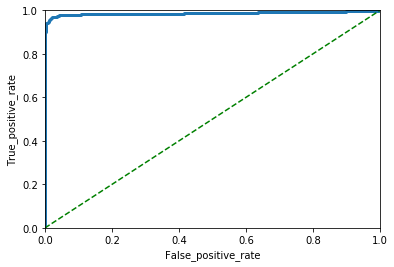

In [255]:
draw_roc_curve(fpr,tpr)

In [256]:
from sklearn.svm import SVC
svm_clf = SVC(random_state =42)
score_svm_clf  = cross_val_score(svm_clf , X_train,y_train,cv=3 , scoring = 'accuracy')
score_svm_clf

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0.94   , 0.955  , 0.95125])

In [257]:
decision_score_svm = cross_val_predict(svm_clf,X_train,y_train,cv= 3 , method = 'decision_function')
fpr_svm, tpr_svm,thresholds_svm = roc_curve(y_train,decision_score_svm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


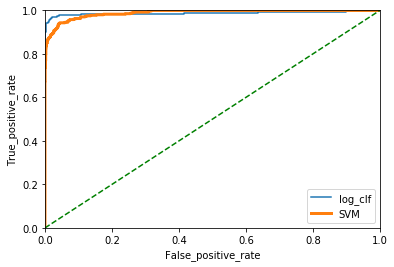

In [258]:
plt.plot(fpr,tpr,label = 'log_clf')
draw_roc_curve(fpr_svm,tpr_svm,label = 'SVM')
plt.legend()

## Testing on Test set

In [259]:
X_test = pipeline.transform(x_test)

In [260]:
X_test.shape

(600, 1001)

In [262]:
log_clf.fit(X_train,y_train)
y_test_pred = log_clf.predict(X_test)

In [263]:
sum(y_test == y_test_pred)/len(y_test)

0.9933333333333333

In [264]:
svm_clf.fit(X_train,y_train)
y_test_pred_svm = svm_clf.predict(X_test)
sum(y_test ==y_test_pred_svm )/len(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9616666666666667

# Saving Model

In [267]:
from sklearn.externals import joblib
filename = 'spam_classifier_model.pkl'
joblib.dump(log_clf,filename)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['spam_classifier_model.pkl']

In [268]:
model = joblib.load(filename)